In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.utils import shuffle
from scipy import stats

In [2]:
data = pd.read_csv('/Users/_fangkhai/Documents/Computer Science Semester 5/Introduction to Data Science/Assignment Dataset/INFY Historical Data.csv').fillna(0)
data["Date"] = pd.to_datetime(data.Date)
data.set_index ("Date", inplace = True)
data.dtypes

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object

In [3]:
data

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,"1,255.80","1,243.00","1,258.40","1,239.00",7.43M,0.72%
2020-12-30,"1,246.80","1,253.00","1,253.30","1,238.15",5.19M,-0.28%
2020-12-29,"1,250.30","1,235.00","1,254.45","1,235.00",6.88M,0.81%
2020-12-28,"1,240.30","1,238.45","1,248.00","1,236.00",4.61M,0.34%
2020-12-24,"1,236.05","1,249.90","1,249.90","1,226.00",7.31M,-1.36%
...,...,...,...,...,...,...
2005-01-07,127.17,126.19,128.05,123.71,33.50M,0.35%
2005-01-06,126.73,126.58,129.85,123.90,27.03M,-0.43%
2005-01-05,127.28,128.05,128.98,124.09,22.20M,-1.79%


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3968 entries, 2020-12-31 to 2005-01-03
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     3968 non-null   object
 1   Open      3968 non-null   object
 2   High      3968 non-null   object
 3   Low       3968 non-null   object
 4   Vol.      3968 non-null   object
 5   Change %  3968 non-null   object
dtypes: object(6)
memory usage: 217.0+ KB


In [5]:
data["Price"] = data["Price"].str.replace(",", "")
data["Open"] = data["Open"].str.replace(",", "")
data["High"] = data["High"].str.replace(",", "")
data["Low"] = data["Low"].str.replace(",", "")
data["Vol."] = data["Vol."].str.replace("M", "")
data["Change %"] = data["Change %"].str.replace("%", "")

In [6]:
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Open'] = pd.to_numeric(data['Open'], errors='coerce')
data['High'] = pd.to_numeric(data['High'], errors='coerce')
data['Low'] = pd.to_numeric(data['Low'], errors='coerce')
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Change %'] = pd.to_numeric(data['Change %'], errors='coerce')

In [7]:
data.isnull().sum()

Price        0
Open         0
High         0
Low          0
Vol.        19
Change %     0
dtype: int64

In [8]:
data.dtypes

Price       float64
Open        float64
High        float64
Low         float64
Vol.        float64
Change %    float64
dtype: object

In [9]:
data = data.fillna(data["Vol."].mean())

In [10]:
data.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [11]:
z = np.abs(stats.zscore(data))
z

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,4.011795,3.952192,3.961247,3.994128,0.377125,0.331705
2020-12-30,3.968926,3.999841,3.937196,3.990039,0.647224,0.183571
2020-12-29,3.985597,3.914072,3.942619,3.974887,0.443444,0.378080
2020-12-28,3.937966,3.930511,3.912202,3.979697,0.717160,0.135900
2020-12-24,3.917722,3.985070,3.921162,3.931595,0.391595,0.740069
...,...,...,...,...,...,...
2005-01-07,1.364090,1.369354,1.369411,1.370711,2.766393,0.141053
2005-01-06,1.366186,1.367496,1.360922,1.369798,1.986241,0.260862
2005-01-05,1.363566,1.360491,1.365025,1.368884,1.403840,0.961637


In [12]:
(np.abs(stats.zscore(data)) > 3).sum()

Price       61
Open        60
High        61
Low         59
Vol.        53
Change %    60
dtype: int64

In [13]:
data_clean = data[((np.abs(stats.zscore(data)))<3).all(axis=1)]
data_clean

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-10-01,1017.65,1020.60,1026.50,1011.75,5.56,0.93
2020-09-30,1008.25,1009.00,1023.95,1005.00,8.05,-0.07
2020-09-29,1009.00,1018.00,1028.00,1004.10,8.71,-0.14
2020-09-28,1010.40,1014.80,1016.15,998.50,8.55,-0.10
2020-09-25,1011.45,975.80,1014.90,975.00,13.31,3.70
...,...,...,...,...,...,...
2005-01-07,127.17,126.19,128.05,123.71,33.50,0.35
2005-01-06,126.73,126.58,129.85,123.90,27.03,-0.43
2005-01-05,127.28,128.05,128.98,124.09,22.20,-1.79


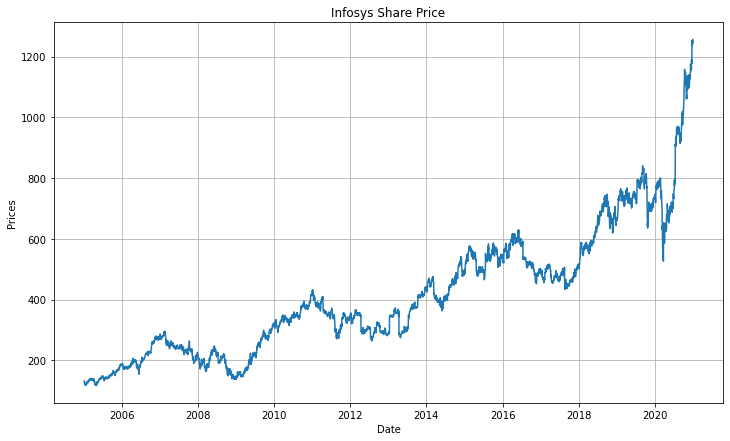

In [14]:
plt.figure(figsize=(12,7))
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("Prices")
plt.plot(data["Price"])
plt.title("Infosys Share Price")
plt.show()

<AxesSubplot:ylabel='Density'>

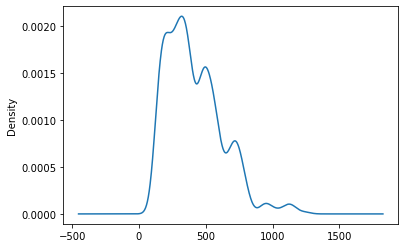

In [15]:
df = data["Price"]
df.plot(kind = "kde")

### SelectKBest

In [16]:
open_price_crosstab = pd.crosstab(data["Open"], data["Price"], margins = True)
open_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Open,,,,,,,,,,,,,,,,,,,,,
117.63,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
117.82,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.38,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.44,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
118.75,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1243.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1249.9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [17]:
high_price_crosstab = pd.crosstab(data["High"], data["Price"], margins = True)
high_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
High,,,,,,,,,,,,,,,,,,,,,
118.75,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.18,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.37,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
119.99,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253.3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1254.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1258.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [18]:
low_price_crosstab = pd.crosstab(data["Low"], data["Price"], margins = True)
low_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Low,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.36,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
116.45,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
116.7,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
117.2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1235.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1236.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1238.15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
vol_price_crosstab = pd.crosstab(data["Vol."], data["Price"], margins = True)
vol_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Vol.,,,,,,,,,,,,,,,,,,,,,
1.09,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.42,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.48,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1.7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92.85,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
98.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
164.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [20]:
change_price_crosstab = pd.crosstab(data["Change %"], data["Price"], margins = True)
change_price_crosstab

Price,117.0,117.91,118.16,118.17,118.21,118.6,118.62,118.68,118.7,118.76,...,1177.3,1189.8,1220.5,1236.05,1240.3,1246.8,1250.3,1253.05,1255.8,All
Change %,,,,,,,,,,,,,,,,,,,,,
-21.26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-16.19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-13.4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-12.66,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
-10.04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11.13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12.03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
13.02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
shuffled_data = shuffle(data, random_state = 800)

#X = Independent Variable
target_col = "Price"
X = data.drop("Price", axis = 1)

#y = Dependent Variable
y = shuffled_data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 800)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3174, 5) (794, 5) (3174,) (794,)


In [22]:
X_n = SelectKBest(f_classif, k = 1).fit_transform(X, y)
X_n.shape

#Another method (Giving Same Results)

X_new = SelectKBest(f_classif, k = 1).fit(X_train, y_train)
X_train.columns[X_new.get_support()]

Index(['Low'], dtype='object')

In [23]:
pd.crosstab(np.squeeze(X_n), np.squeeze(y))

Price,117.00,117.91,118.16,118.17,118.21,118.60,118.62,118.68,118.70,118.76,...,1175.20,1177.30,1189.80,1220.50,1236.05,1240.30,1246.80,1250.30,1253.05,1255.80
row_0,,,,,,,,,,,,,,,,,,,,,
116.28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.45,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
116.70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117.20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230.55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1235.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1236.00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
data = data.groupby("Date").sum()

In [25]:
data = data.resample(rule = 'MS').sum()

In [26]:
data.head(10)

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2005-01-01,2352.36,2369.36,2416.32,2312.63,444.13,-0.69
2005-02-01,2634.80,2631.08,2658.07,2599.79,284.87,8.16
2005-03-01,3013.97,3015.34,3049.32,2976.80,259.22,0.98
2005-04-01,2533.99,2553.12,2583.44,2501.42,372.82,-17.44
2005-05-01,2845.35,2819.40,2874.05,2796.44,376.74,17.92
2005-06-01,3257.01,3245.84,3294.02,3213.51,321.51,4.95
2005-07-01,2809.92,2824.55,2854.74,2777.95,337.80,-3.52
2005-08-01,3133.15,3129.84,3164.64,3096.35,263.07,4.83
2005-09-01,3180.19,3179.49,3213.31,3143.01,244.24,5.94


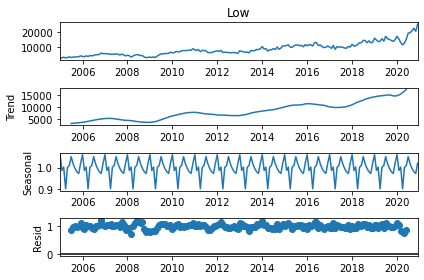

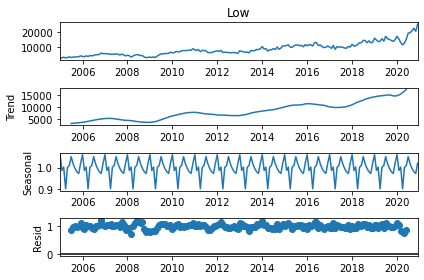

In [27]:
result = seasonal_decompose(data["Low"], model = "multiplicable", period = 12)
result.plot()

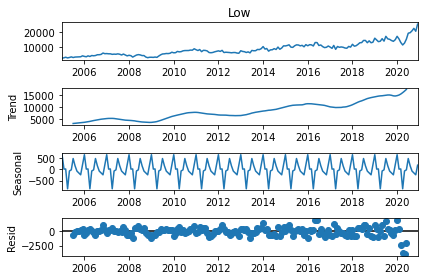

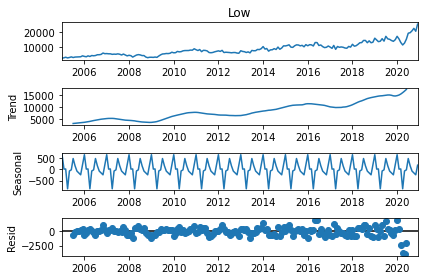

In [28]:
result = seasonal_decompose(data["Low"], model = "additive", period = 12)
result.plot()

In [46]:
train_size = int(len(data) * 0.7)
train, test = data.iloc[:train_size], data.iloc[train_size:]

In [47]:
model = ExponentialSmoothing(train["Low"], trend = "add", seasonal = "add", seasonal_periods = 12).fit()

In [54]:
test_pred = model.forecast(58)

In [55]:
test_pred

2016-03-01    11483.521453
2016-04-01    10526.041210
2016-05-01    11251.015105
2016-06-01    11690.761714
2016-07-01    12156.721643
2016-08-01    11816.627927
2016-09-01    11988.445296
2016-10-01    11937.097314
2016-11-01    11922.809662
2016-12-01    12665.192865
2017-01-01    12594.766036
2017-02-01    12082.307793
2017-03-01    12335.236300
2017-04-01    11377.756057
2017-05-01    12102.729952
2017-06-01    12542.476561
2017-07-01    13008.436490
2017-08-01    12668.342774
2017-09-01    12840.160143
2017-10-01    12788.812161
2017-11-01    12774.524509
2017-12-01    13516.907713
2018-01-01    13446.480883
2018-02-01    12934.022640
2018-03-01    13186.951147
2018-04-01    12229.470904
2018-05-01    12954.444799
2018-06-01    13394.191408
2018-07-01    13860.151337
2018-08-01    13520.057621
2018-09-01    13691.874990
2018-10-01    13640.527008
2018-11-01    13626.239356
2018-12-01    14368.622560
2019-01-01    14298.195730
2019-02-01    13785.737487
2019-03-01    14038.665994
2

<AxesSubplot:xlabel='Date'>

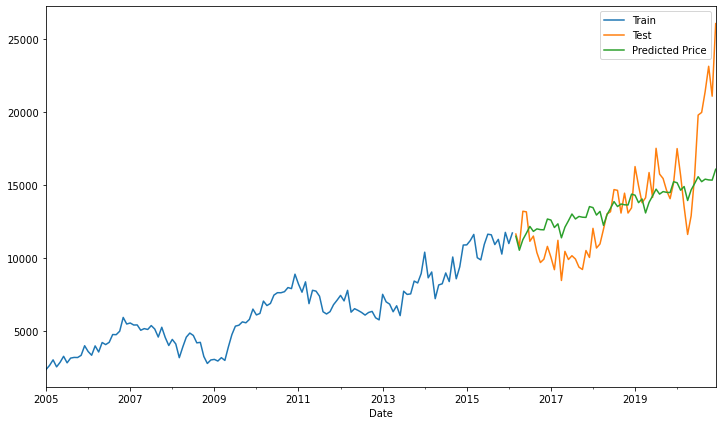

In [56]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [57]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

14.834549922411117

In [58]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

2010.2546658826177

In [59]:
mse = mean_squared_error(test["Price"], test_pred)
mse

7576030.861757702

In [60]:
rmse = math.sqrt(mse)
rmse

2752.4590572354937

In [61]:
model = ExponentialSmoothing(train["Low"], trend = "mul", seasonal = "mul", seasonal_periods = 12).fit()

/Users/_fangkhai/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [62]:
test_pred = model.forecast(58)

In [63]:
test_pred

2016-03-01    11518.536523
2016-04-01    10345.625684
2016-05-01    11821.602195
2016-06-01    12825.882012
2016-07-01    13780.440863
2016-08-01    13388.165612
2016-09-01    13776.373652
2016-10-01    13676.475430
2016-11-01    13598.494747
2016-12-01    14554.792992
2017-01-01    14525.133980
2017-02-01    13425.504644
2017-03-01    13790.863115
2017-04-01    12386.565547
2017-05-01    14153.716259
2017-06-01    15356.116013
2017-07-01    16498.986066
2017-08-01    16029.324467
2017-09-01    16494.116494
2017-10-01    16374.510787
2017-11-01    16281.146416
2017-12-01    17426.099002
2018-01-01    17390.588991
2018-02-01    16074.029580
2018-03-01    16511.464375
2018-04-01    14830.133114
2018-05-01    16945.899603
2018-06-01    18385.503531
2018-07-01    19753.833997
2018-08-01    19191.519609
2018-09-01    19748.003777
2018-10-01    19604.802779
2018-11-01    19493.019892
2018-12-01    20863.843726
2019-01-01    20821.328454
2019-02-01    19245.043951
2019-03-01    19768.773973
2

<AxesSubplot:xlabel='Date'>

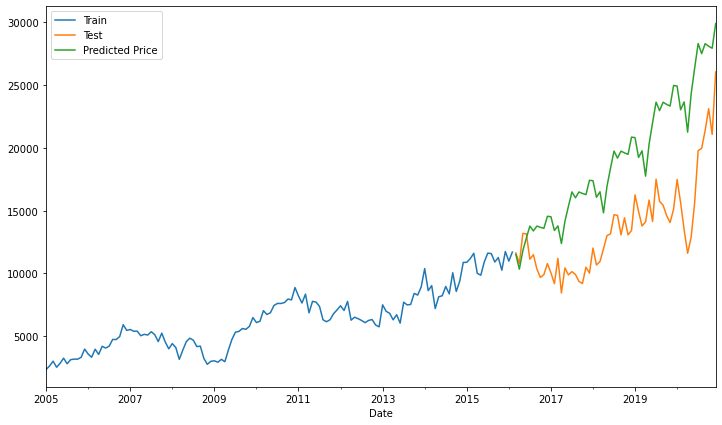

In [64]:
train["Price"].plot(legend = True, label = "Train", figsize = (12, 7))
test["Price"].plot(legend = True, label = "Test")
test_pred.plot(legend = True, label = "Predicted Price")

In [65]:
mape = np.mean(np.abs((test["Price"] - test_pred) / test["Price"])) * 100
mape

42.791601360134386

In [66]:
mae = mean_absolute_error(test["Price"], test_pred)
mae

5611.449509840078

In [67]:
mse = mean_squared_error(test["Price"], test_pred)
mse

37901409.86433595

In [68]:
rmse = math.sqrt(mse)
rmse

6156.412093446633